## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb

In [2]:
pd.set_option('display.max_rows',300) 
pd.set_option('display.max_columns',300)

## Importing Dataset

In [3]:
df = pd.read_excel('ICU_Prediction.xlsx')
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,BE_VENOUS_MEDIAN,BE_VENOUS_MEAN,BE_VENOUS_MIN,BE_VENOUS_MAX,BE_VENOUS_DIFF,BIC_ARTERIAL_MEDIAN,BIC_ARTERIAL_MEAN,BIC_ARTERIAL_MIN,BIC_ARTERIAL_MAX,BIC_ARTERIAL_DIFF,BIC_VENOUS_MEDIAN,BIC_VENOUS_MEAN,BIC_VENOUS_MIN,BIC_VENOUS_MAX,BIC_VENOUS_DIFF,BILLIRUBIN_MEDIAN,BILLIRUBIN_MEAN,BILLIRUBIN_MIN,BILLIRUBIN_MAX,BILLIRUBIN_DIFF,BLAST_MEDIAN,BLAST_MEAN,BLAST_MIN,BLAST_MAX,BLAST_DIFF,CALCIUM_MEDIAN,CALCIUM_MEAN,CALCIUM_MIN,CALCIUM_MAX,CALCIUM_DIFF,CREATININ_MEDIAN,CREATININ_MEAN,CREATININ_MIN,CREATININ_MAX,CREATININ_DIFF,FFA_MEDIAN,FFA_MEAN,FFA_MIN,FFA_MAX,FFA_DIFF,GGT_MEDIAN,GGT_MEAN,GGT_MIN,GGT_MAX,GGT_DIFF,GLUCOSE_MEDIAN,GLUCOSE_MEAN,GLUCOSE_MIN,GLUCOSE_MAX,GLUCOSE_DIFF,HEMATOCRITE_MEDIAN,HEMATOCRITE_MEAN,HEMATOCRITE_MIN,HEMATOCRITE_MAX,HEMATOCRITE_DIFF,HEMOGLOBIN_MEDIAN,HEMOGLOBIN_MEAN,HEMOGLOBIN_MIN,HEMOGLOBIN_MAX,HEMOGLOBIN_DIFF,INR_MEDIAN,INR_MEAN,INR_MIN,INR_MAX,INR_DIFF,LACTATE_MEDIAN,LACTATE_MEAN,LACTATE_MIN,LACTATE_MAX,LACTATE_DIFF,LEUKOCYTES_MEDIAN,LEUKOCYTES_MEAN,LEUKOCYTES_MIN,LEUKOCYTES_MAX,LEUKOCYTES_DIFF,LINFOCITOS_MEDIAN,LINFOCITOS_MEAN,LINFOCITOS_MIN,LINFOCITOS_MAX,LINFOCITOS_DIFF,NEUTROPHILES_MEDIAN,NEUTROPHILES_MEAN,NEUTROPHILES_MIN,NEUTROPHILES_MAX,NEUTROPHILES_DIFF,P02_ARTERIAL_MEDIAN,P02_ARTERIAL_MEAN,P02_ARTERIAL_MIN,P02_ARTERIAL_MAX,P02_ARTERIAL_DIFF,P02_VENOUS_MEDIAN,P02_VENOUS_MEAN,P02_VENOUS_MIN,P02_VENOUS_MAX,P02_VENOUS_DIFF,PC02_ARTERIAL_MEDIAN,PC02_ARTERIAL_MEAN,PC02_ARTERIAL_MIN,PC02_ARTERIAL_MAX,PC02_ARTERIAL_DIFF,PC02_VENOUS_MEDIAN,PC02_VENOUS_MEAN,PC02_VENOUS_MIN,PC02_VENOUS_MAX,PC02_VENOUS_DIFF,PCR_MEDIAN,PCR_MEAN,PCR_MIN,PCR_MAX,PCR_DIFF,PH_ARTERIAL_MEDIAN,PH_ARTERIAL_MEAN,PH_ARTERIAL_MIN,PH_ARTERIAL_MAX,PH_ARTERIAL_DIFF,PH_VENOUS_MEDIAN,PH_VENOUS_MEAN,PH_VENOUS_MIN,PH_VENOUS_MAX,PH_VENOUS_DIFF,PLATELETS_MEDIAN,PLATELETS_MEAN,PLATELETS_MIN,PLATELETS_MAX,PLATELETS_DIFF,POTASSIUM_MEDIAN,POTASSIUM_MEAN,POTASSIUM_MIN,POTASSIUM_MAX,POTASSIUM_DIFF,SAT02_ARTERIAL_MEDIAN,SAT02_ARTERIAL_MEAN,SAT02_ARTERIAL_MIN,SAT02_ARTERIAL_MAX,SAT02_ARTERIAL_DIFF,SAT02_VENOUS_MEDIAN,SAT02_VENOUS_MEAN,SAT02_VENOUS_MIN,SAT02_VENOUS_MAX,SAT02_VENOUS_DIFF,SODIUM_MEDIAN,SODIUM_MEAN,SODIUM_MIN,SODIUM_MAX,SODIUM_DIFF,TGO_MEDIAN,TGO_MEAN,TGO_MIN,TGO_MAX,TGO_DIFF,TGP_MEDIAN,TGP_MEAN,TGP_MIN,TGP_MAX,TGP_DIFF,TTPA_MEDIAN,TTPA_MEAN,TTPA_MIN,TTPA_MAX,TTPA_DIFF,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
print(df.shape)
print("This dataset has ", df.shape[0], " rows and ", df.shape[1], " columns.")

(1925, 231)
This dataset has  1925  rows and  231  columns.


In [5]:
# Function to print the null values of all columns
def print_na(df):
    for i in range(df.isna().sum().shape[0]):
        f = df.isna().sum().index[i]
        v = df.isna().sum()[i]
        print(f, " : ", v)

In [6]:
print_na(df)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  5
DISEASE GROUPING 2  :  5
DISEASE GROUPING 3  :  5
DISEASE GROUPING 4  :  5
DISEASE GROUPING 5  :  5
DISEASE GROUPING 6  :  5
HTN  :  5
IMMUNOCOMPROMISED  :  5
OTHER  :  5
ALBUMIN_MEDIAN  :  1104
ALBUMIN_MEAN  :  1104
ALBUMIN_MIN  :  1104
ALBUMIN_MAX  :  1104
ALBUMIN_DIFF  :  1104
BE_ARTERIAL_MEDIAN  :  1104
BE_ARTERIAL_MEAN  :  1104
BE_ARTERIAL_MIN  :  1104
BE_ARTERIAL_MAX  :  1104
BE_ARTERIAL_DIFF  :  1104
BE_VENOUS_MEDIAN  :  1104
BE_VENOUS_MEAN  :  1104
BE_VENOUS_MIN  :  1104
BE_VENOUS_MAX  :  1104
BE_VENOUS_DIFF  :  1104
BIC_ARTERIAL_MEDIAN  :  1104
BIC_ARTERIAL_MEAN  :  1104
BIC_ARTERIAL_MIN  :  1104
BIC_ARTERIAL_MAX  :  1104
BIC_ARTERIAL_DIFF  :  1104
BIC_VENOUS_MEDIAN  :  1104
BIC_VENOUS_MEAN  :  1104
BIC_VENOUS_MIN  :  1104
BIC_VENOUS_MAX  :  1104
BIC_VENOUS_DIFF  :  1104
BILLIRUBIN_MEDIAN  :  1104
BILLIRUBIN_MEAN  :  1104
BILLIRUBIN_MIN  :  1104
BILLIRUBIN_MAX  :  1104
BI

## Filling of Missing Values
The Missing values are filled considering each patient and using the next and previous values from the different windows of that patient, so we are passing each patient to the Filling function

In [7]:
def fill_na_val(df_model):
    df_model.fillna(method='ffill', inplace = True) 
    df_model.fillna(method='bfill', inplace = True)

In [8]:
df_final = df.copy() 
for i in range(0,len(df_final),5):
    fill_na_val(df_final[i:i+5])

C:\Users\VaishnavPuram\anaconda3\lib\site-packages\pandas\core\frame.py:4462: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


### Checking for duplicate columns

In [9]:
duplicated = df_final.T.duplicated()
count = 0

# The first instance of a column is marked as 'False', when the value is seen to be repeated in other 
# column(s) it is marked as 'True'
for i in range(len(duplicated)):
    if duplicated[i] == True:
        print(duplicated.index[i], ":", duplicated[i])
        count += 1
        
# 143 duplicate columns
print("total duplicate columns = ", count)

ALBUMIN_MEAN : True
ALBUMIN_MIN : True
ALBUMIN_MAX : True
BE_ARTERIAL_MEAN : True
BE_ARTERIAL_MIN : True
BE_ARTERIAL_MAX : True
BE_ARTERIAL_DIFF : True
BE_VENOUS_MEAN : True
BE_VENOUS_MIN : True
BE_VENOUS_MAX : True
BE_VENOUS_DIFF : True
BIC_ARTERIAL_MEAN : True
BIC_ARTERIAL_MIN : True
BIC_ARTERIAL_MAX : True
BIC_ARTERIAL_DIFF : True
BIC_VENOUS_MEAN : True
BIC_VENOUS_MIN : True
BIC_VENOUS_MAX : True
BIC_VENOUS_DIFF : True
BILLIRUBIN_MEAN : True
BILLIRUBIN_MIN : True
BILLIRUBIN_MAX : True
BILLIRUBIN_DIFF : True
BLAST_MEAN : True
BLAST_MIN : True
BLAST_MAX : True
BLAST_DIFF : True
CALCIUM_MEAN : True
CALCIUM_MIN : True
CALCIUM_MAX : True
CALCIUM_DIFF : True
CREATININ_MEAN : True
CREATININ_MIN : True
CREATININ_MAX : True
CREATININ_DIFF : True
FFA_MEAN : True
FFA_MIN : True
FFA_MAX : True
FFA_DIFF : True
GGT_MEAN : True
GGT_MIN : True
GGT_MAX : True
GGT_DIFF : True
GLUCOSE_MEAN : True
GLUCOSE_MIN : True
GLUCOSE_MAX : True
GLUCOSE_DIFF : True
HEMATOCRITE_MEAN : True
HEMATOCRITE_MIN : True
H

In [10]:
df_final = df_final.T.drop_duplicates().T
df_final.shape
# 231 - 143 = 88

(1925, 88)

In [11]:
print_na(df_final)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  5
DISEASE GROUPING 2  :  5
DISEASE GROUPING 3  :  5
DISEASE GROUPING 4  :  5
DISEASE GROUPING 5  :  5
DISEASE GROUPING 6  :  5
HTN  :  5
IMMUNOCOMPROMISED  :  5
OTHER  :  5
ALBUMIN_MEDIAN  :  10
ALBUMIN_DIFF  :  10
BE_ARTERIAL_MEDIAN  :  10
BE_VENOUS_MEDIAN  :  10
BIC_ARTERIAL_MEDIAN  :  10
BIC_VENOUS_MEDIAN  :  10
BILLIRUBIN_MEDIAN  :  10
BLAST_MEDIAN  :  10
CALCIUM_MEDIAN  :  10
CREATININ_MEDIAN  :  10
FFA_MEDIAN  :  10
GGT_MEDIAN  :  10
GLUCOSE_MEDIAN  :  10
HEMATOCRITE_MEDIAN  :  10
HEMOGLOBIN_MEDIAN  :  10
INR_MEDIAN  :  10
LACTATE_MEDIAN  :  10
LEUKOCYTES_MEDIAN  :  10
LINFOCITOS_MEDIAN  :  10
NEUTROPHILES_MEDIAN  :  10
P02_ARTERIAL_MEDIAN  :  10
P02_VENOUS_MEDIAN  :  10
PC02_ARTERIAL_MEDIAN  :  10
PC02_VENOUS_MEDIAN  :  10
PCR_MEDIAN  :  10
PH_ARTERIAL_MEDIAN  :  10
PH_VENOUS_MEDIAN  :  10
PLATELETS_MEDIAN  :  10
POTASSIUM_MEDIAN  :  10
SAT02_ARTERIAL_MEDIAN  :  10
SAT02_VENO

There are more null values are there so let's check what all rows are having the null values ,
lets check by seeing the column 'DISEASE GROUPING 1'

In [12]:
df_final[df_final['DISEASE GROUPING 1'].isna()]
# So here we see the PATIENT_VISIT_IDENTIFIER = 199 has all the values ase null and even in all windows so let's drop all the rows which contains 199

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
995,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0-2,0
996,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2-4,0
997,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
998,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6-12,0
999,199,0,10th,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ABOVE_12,0


In [13]:
df_final = df_final[df_final['PATIENT_VISIT_IDENTIFIER'] != 199]

In [14]:
# Checking again the null values in each feature
print_na(df_final)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  0
DISEASE GROUPING 2  :  0
DISEASE GROUPING 3  :  0
DISEASE GROUPING 4  :  0
DISEASE GROUPING 5  :  0
DISEASE GROUPING 6  :  0
HTN  :  0
IMMUNOCOMPROMISED  :  0
OTHER  :  0
ALBUMIN_MEDIAN  :  5
ALBUMIN_DIFF  :  5
BE_ARTERIAL_MEDIAN  :  5
BE_VENOUS_MEDIAN  :  5
BIC_ARTERIAL_MEDIAN  :  5
BIC_VENOUS_MEDIAN  :  5
BILLIRUBIN_MEDIAN  :  5
BLAST_MEDIAN  :  5
CALCIUM_MEDIAN  :  5
CREATININ_MEDIAN  :  5
FFA_MEDIAN  :  5
GGT_MEDIAN  :  5
GLUCOSE_MEDIAN  :  5
HEMATOCRITE_MEDIAN  :  5
HEMOGLOBIN_MEDIAN  :  5
INR_MEDIAN  :  5
LACTATE_MEDIAN  :  5
LEUKOCYTES_MEDIAN  :  5
LINFOCITOS_MEDIAN  :  5
NEUTROPHILES_MEDIAN  :  5
P02_ARTERIAL_MEDIAN  :  5
P02_VENOUS_MEDIAN  :  5
PC02_ARTERIAL_MEDIAN  :  5
PC02_VENOUS_MEDIAN  :  5
PCR_MEDIAN  :  5
PH_ARTERIAL_MEDIAN  :  5
PH_VENOUS_MEDIAN  :  5
PLATELETS_MEDIAN  :  5
POTASSIUM_MEDIAN  :  5
SAT02_ARTERIAL_MEDIAN  :  5
SAT02_VENOUS_MEDIAN  :  5
SODIUM_MEDIAN 

There are more null values left so lets check from the feature 'ALBUMIN_MEDIAN'

In [15]:
df_final[ df_final['ALBUMIN_MEDIAN'].isna() ]
# So here we see the PATIENT_VISIT_IDENTIFIER = 287 has all the values ase null and even in all windows so let's drop all the rows which contains 287

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1435,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.111111,-0.630769,0.509434,-0.254237,0.107143,0.842105,-0.111111,-0.630769,0.509434,-0.241379,0.107143,0.842105,0.072165,-0.325,0.555556,-0.142857,0.450549,0.939394,-0.384615,-0.740541,0.19403,-0.333333,-0.101449,0.842105,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1436,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.481481,-0.646154,0.037736,-0.457627,-0.160714,0.842105,-0.481481,-0.646154,0.037736,-0.448276,-0.160714,0.842105,-0.278351,-0.3375,0.094017,-0.428571,0.274725,0.939394,-0.606838,-0.751351,-0.149254,-0.454545,-0.304348,0.842105,-0.930435,-1.0,-0.938931,-0.882353,-0.97619,-1.0,-0.926773,-1.0,-0.963104,-0.88455,-0.975958,-1.0,2-4,0
1437,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.481481,-0.646154,0.037736,-0.457627,-0.160714,0.842105,-0.481481,-0.646154,0.037736,-0.448276,-0.160714,0.842105,-0.278351,-0.3375,0.094017,-0.428571,0.274725,0.939394,-0.606838,-0.751351,-0.149254,-0.454545,-0.304348,0.842105,-0.930435,-1.0,-0.938931,-0.882353,-0.97619,-1.0,-0.926773,-1.0,-0.963104,-0.88455,-0.975958,-1.0,4-6,0
1438,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.547325,-0.8,0.150943,-0.322034,0.035714,0.789474,-0.555556,-0.830769,0.150943,-0.310345,0.035714,0.789474,-0.298969,-0.4875,0.230769,-0.214286,0.406593,0.919192,-0.675214,-0.816216,-0.089552,-0.393939,-0.15942,0.789474,-0.982609,-0.92638,-1.0,-1.0,-1.0,-1.0,-0.980676,-0.896453,-1.0,-1.0,-1.0,-1.0,6-12,0
1439,287,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.220576,-0.506154,-0.022327,-0.684746,0.027976,0.819298,-0.246914,-0.523077,-0.07

In [16]:
df_final = df_final[ df_final['PATIENT_VISIT_IDENTIFIER'] != 287 ]

In [17]:
# Checking again the null values in each feature
print_na(df_final)

PATIENT_VISIT_IDENTIFIER  :  0
AGE_ABOVE65  :  0
AGE_PERCENTIL  :  0
GENDER  :  0
DISEASE GROUPING 1  :  0
DISEASE GROUPING 2  :  0
DISEASE GROUPING 3  :  0
DISEASE GROUPING 4  :  0
DISEASE GROUPING 5  :  0
DISEASE GROUPING 6  :  0
HTN  :  0
IMMUNOCOMPROMISED  :  0
OTHER  :  0
ALBUMIN_MEDIAN  :  0
ALBUMIN_DIFF  :  0
BE_ARTERIAL_MEDIAN  :  0
BE_VENOUS_MEDIAN  :  0
BIC_ARTERIAL_MEDIAN  :  0
BIC_VENOUS_MEDIAN  :  0
BILLIRUBIN_MEDIAN  :  0
BLAST_MEDIAN  :  0
CALCIUM_MEDIAN  :  0
CREATININ_MEDIAN  :  0
FFA_MEDIAN  :  0
GGT_MEDIAN  :  0
GLUCOSE_MEDIAN  :  0
HEMATOCRITE_MEDIAN  :  0
HEMOGLOBIN_MEDIAN  :  0
INR_MEDIAN  :  0
LACTATE_MEDIAN  :  0
LEUKOCYTES_MEDIAN  :  0
LINFOCITOS_MEDIAN  :  0
NEUTROPHILES_MEDIAN  :  0
P02_ARTERIAL_MEDIAN  :  0
P02_VENOUS_MEDIAN  :  0
PC02_ARTERIAL_MEDIAN  :  0
PC02_VENOUS_MEDIAN  :  0
PCR_MEDIAN  :  0
PH_ARTERIAL_MEDIAN  :  0
PH_VENOUS_MEDIAN  :  0
PLATELETS_MEDIAN  :  0
POTASSIUM_MEDIAN  :  0
SAT02_ARTERIAL_MEDIAN  :  0
SAT02_VENOUS_MEDIAN  :  0
SODIUM_MEDIAN 

In [18]:
df_model = df_final.copy()

In [19]:
# If the patient was ever admitted to the ICU in any of the windows, make the first window i.e 0-2 as True
def generate_icu_feature(p_id):
    df1 = df_model[df_model['PATIENT_VISIT_IDENTIFIER']==p_id]
    icu_track = df1['ICU']
    icu = False
    for t in icu_track:
        icu = icu or t
    return icu

df_model['ICU'] = df_model.apply(lambda x : generate_icu_feature(x['PATIENT_VISIT_IDENTIFIER']), axis = 1)

In [20]:
patient_id = df_model['PATIENT_VISIT_IDENTIFIER'].unique()


NA_filled_first_window = []

# Iterate for each unique patient id
for p_id in patient_id:
    # create a temporary dataframe to hold details for each patient
    temp = df_model[ df_model['PATIENT_VISIT_IDENTIFIER'] == p_id ]
    # Fill missing data with mean of values
    # using dataframe.iloc[[0]] => returns a dataframe
    # using dataframe.iloc[0] => returns a series
    NA_filled_first_window.append(temp.iloc[[0]])
    
# Concatenate dataframes from NA_filled_first_window to assemble the final dataframe
df_model = pd.concat(NA_filled_first_window)

In [21]:
df_model

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.08642,-0.230769,-0.283019,-0.59322,-0.285714,0.736842,0.08642,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0,-0.162393,-0.5,0.208791,0.89899,-0.247863,-0.459459,-0.432836,-0.636364,-0.42029,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1
5,1,1,90th,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,-0.210526,-1.0,-1.0,-1.0,-0.317073,-0.219512,-0.967556,-1.0,0.530612,-0.615004,-0.769723,-0.982477,-0.891993,-0.870021,-0.914634,-0.959849,-1.0,-0.523754,-0.858921,-0.557023,-0.170732,1.0,-0.77931,-0.496933,-0.834405,0.234043,-0.060606,-0.636849,-0.62963,0.939394,1.0,-0.257143,-0.997014,-0.993902,-0.846633,-0.561446,-0.978029,-0.283951,-0.046154,0.188679,0.830508,-0.107143,1.0,-0.283951,-0.046154,0.188679,0.862069,-0.107143,1.0,-0.072165,0.15,0.264957,1.0,0.318681,1.0,-0.504274,-0.32973,-0.059701,0.636364,-0.275362,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,1
10,2,0,10th,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.357143,-0.912243,-0.742004,-0.958528,-0.780261,0.144654,0.158537,-0.959849,1.0,-0.382773,-0.908714,-0.412965,-0.170732,-0.704142,-0.77931,-0.754601,-0.939887,0.234043,0.363636,-0.399199,-0.703704,0.939394,0.345679,0.085714,-0.995428,-0.986662,-0.846633,-0.836145,-0.978029,-0.489712,-0.68547,-0.048218,-0.645951,0.357143,0.935673,-0.506173,-0.815385,-0.056604,-0.517241,0.357143,0.947368,-0.525773,-0.5125,-0.111111,-0.714286,0.604396,0.959596,-0.435897,-0.491892,0.0,-0.575758,0.101449,1.0,-0.547826,-0.533742,-0.603053,-0.764706,-1.0,-0.959596,-0.515528,-0.351328,-0.747001,-0.756272,-1.0,-0.961262,0-2,1
15,3,0,40th,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.263158,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.972789,-1.0,0.326531,-0.968861,-0.19403,-0.316589,-0.891993,-0.203354,-0.219512,-0.959849,-0.828421,-0.729239,-0.8361,-0.784714,-0.170732,-0.633136,-0.77931,-0.779141,-0.503592,0.234043,0.363636,-0.564753,-0.777778,0.939394,0.580247,0.2,-0

In [22]:
df_final

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.08642,-0.230769,-0.283019,-0.59322,-0.285714,0.736842,0.08642,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0,-0.162393,-0.5,0.208791,0.89899,-0.247863,-0.459459,-0.432836,-0.636364,-0.42029,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613

# Data Visualization
We will be working with the dataframe 'df_model'

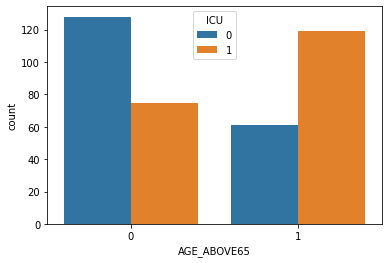

In [23]:
# AGE_ABOVE65
ax = sb.countplot(x="AGE_ABOVE65", hue="ICU", data=df_model)
## People with age above 65 have a higher chance of needing an ICU

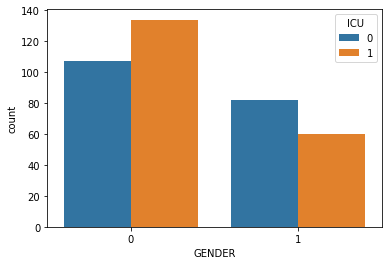

In [24]:
# GENDER
ax = sb.countplot(x="GENDER", hue="ICU", data=df_model)

## Gender 0 is at a slightly higher risk if considered standalone
## Although there might be  other factors influencing the high icu count for Gender 0

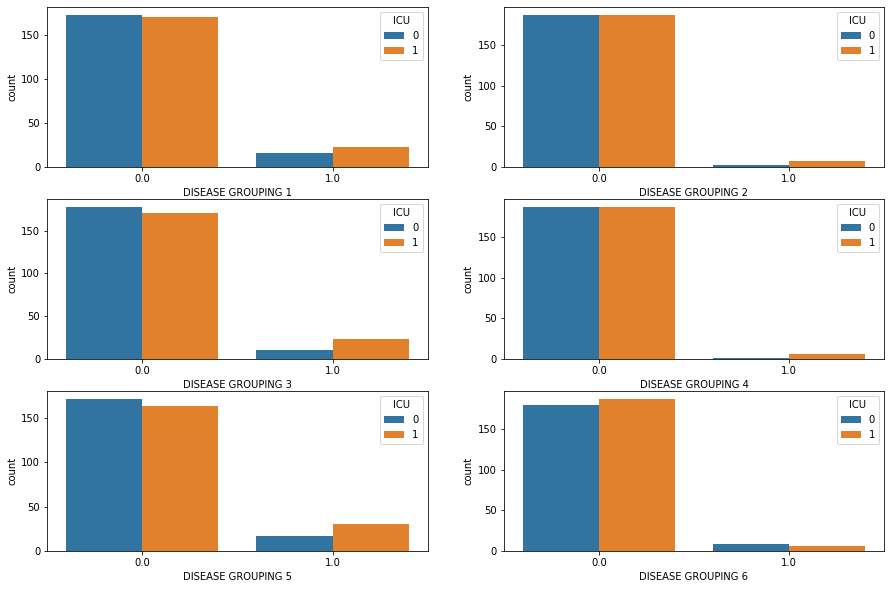

In [25]:
#Visualizing all the disease groupings
disease_grp = ['DISEASE GROUPING 1','DISEASE GROUPING 2','DISEASE GROUPING 3',
               'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6']

fig, axes = plt.subplots(ncols=2,nrows=3,figsize=(15,10))

col = 0

for i in range(len(disease_grp)):
    sb.countplot(x=disease_grp[i], hue="ICU", data=df_model, ax = axes[int((i)/2)][col])
    col = (col+1) % 2

<AxesSubplot:xlabel='HTN', ylabel='count'>

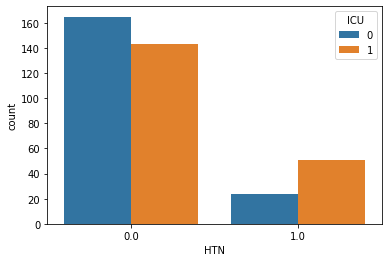

In [26]:
# HTN - Hypertension
sb.countplot(x="HTN", hue="ICU", data=df_model)
# It's seen that people who are having Hypertension have a slight chance of needing the ICU
# But we can't conclude the this fact as there are lot of data imbalance to it

<AxesSubplot:xlabel='IMMUNOCOMPROMISED', ylabel='count'>

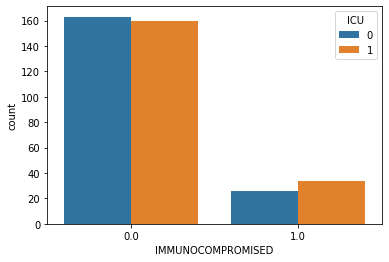

In [27]:
# IMMUNOCOMPROMISED
sb.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=df_model)
# It's seen that Immunocompromised or non-immunocompromised does not make a significant difference, the distribution.

<AxesSubplot:xlabel='OTHER', ylabel='count'>

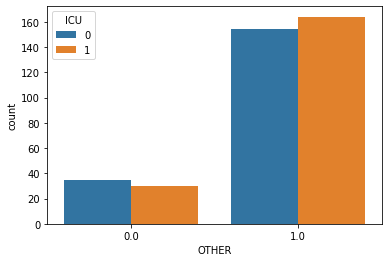

In [28]:
# Others
sb.countplot(x="OTHER", hue="ICU", data=df_model)

In [29]:
def get_percentile(percentile_string):
    if (percentile_string =='Above 90th'):
        return 95
    else:
        return int(percentile_string[:-2])
    
df_model['AGE_PERCENTIL'] = df_model['AGE_PERCENTIL'].apply(lambda x : get_percentile(x))

<AxesSubplot:xlabel='AGE_PERCENTIL', ylabel='count'>

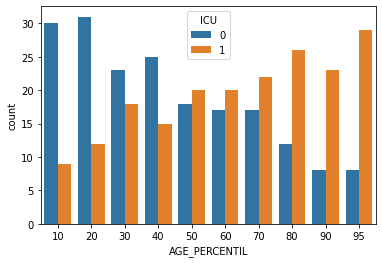

In [30]:
# Plotting the graphs with respect to Age percentile
sb.countplot(x="AGE_PERCENTIL", hue="ICU", data=df_model)
# So from above age 50 percentile , people tend to get admitted to ICU 

## Preparing Machine Learning model 

In [31]:
# We are taking the categorical variables and splitting them up so it would be easier for modelling
df_final = pd.get_dummies(df_final, columns= ['WINDOW','AGE_PERCENTIL'], drop_first= True)

In [32]:
df_final

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.08642,-0.230769,-0.283019,-0.59322,-0.285714,0.736842,0.08642,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0,-0.162393,-0.5,0.208791,0.89899,-0.247863,-0.459459,-0.432836,-0.636364,-0.42029,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.1

In [33]:
df_final.drop('PATIENT_VISIT_IDENTIFIER',axis=1,inplace=True)
#this feature is not required for the model

In [34]:
df_final
# We will be using this dataframe for modelling 

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.08642,-0.230769,-0.283019,-0.59322,-0.285714,0.736842,0.08642,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0,-0.162393,-0.5,0.208791,0.89899,-0.247863,-0.459459,-0.432836,-0.636364,-0.42029,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.9450

## Splitting Training and Testing data

In [35]:
# Importing from the sklearn library
from sklearn.model_selection import train_test_split

In [36]:
X =  df_final.drop(['ICU'],axis='columns')
y = df_final['ICU']

In [37]:
X

,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_VENOUS_MEDIAN,BIC_ARTERIAL_MEDIAN,BIC_VENOUS_MEDIAN,BILLIRUBIN_MEDIAN,BLAST_MEDIAN,CALCIUM_MEDIAN,CREATININ_MEDIAN,FFA_MEDIAN,GGT_MEDIAN,GLUCOSE_MEDIAN,HEMATOCRITE_MEDIAN,HEMOGLOBIN_MEDIAN,INR_MEDIAN,LACTATE_MEDIAN,LEUKOCYTES_MEDIAN,LINFOCITOS_MEDIAN,NEUTROPHILES_MEDIAN,P02_ARTERIAL_MEDIAN,P02_VENOUS_MEDIAN,PC02_ARTERIAL_MEDIAN,PC02_VENOUS_MEDIAN,PCR_MEDIAN,PH_ARTERIAL_MEDIAN,PH_VENOUS_MEDIAN,PLATELETS_MEDIAN,POTASSIUM_MEDIAN,SAT02_ARTERIAL_MEDIAN,SAT02_VENOUS_MEDIAN,SODIUM_MEDIAN,TGO_MEDIAN,TGP_MEDIAN,TTPA_MEDIAN,UREA_MEDIAN,DIMER_MEDIAN,BLOODPRESSURE_DIASTOLIC_MEAN,BLOODPRESSURE_SISTOLIC_MEAN,HEART_RATE_MEAN,RESPIRATORY_RATE_MEAN,TEMPERATURE_MEAN,OXYGEN_SATURATION_MEAN,BLOODPRESSURE_DIASTOLIC_MEDIAN,BLOODPRESSURE_SISTOLIC_MEDIAN,HEART_RATE_MEDIAN,RESPIRATORY_RATE_MEDIAN,TEMPERATURE_MEDIAN,OXYGEN_SATURATION_MEDIAN,BLOODPRESSURE_DIASTOLIC_MIN,BLOODPRESSURE_SISTOLIC_MIN,HEART_RATE_MIN,RESPIRATORY_RATE_MIN,TEMPERATURE_MIN,OXYGEN_SATURATION_MIN,BLOODPRESSURE_DIASTOLIC_MAX,BLOODPRESSURE_SISTOLIC_MAX,HEART_RATE_MAX,RESPIRATORY_RATE_MAX,TEMPERATURE_MAX,OXYGEN_SATURATION_MAX,BLOODPRESSURE_DIASTOLIC_DIFF,BLOODPRESSURE_SISTOLIC_DIFF,HEART_RATE_DIFF,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW_2-4,WINDOW_4-6,WINDOW_6-12,WINDOW_ABOVE_12,AGE_PERCENTIL_20th,AGE_PERCENTIL_30th,AGE_PERCENTIL_40th,AGE_PERCENTIL_50th,AGE_PERCENTIL_60th,AGE_PERCENTIL_70th,AGE_PERCENTIL_80th,AGE_PERCENTIL_90th,AGE_PERCENTIL_Above 90th
0,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.08642,-0.230769,-0.283019,-0.59322,-0.285714,0.736842,0.08642,-0.230769,-0.283019,-0.586207,-0.285714,0.736842,0.237113,0.0,-0.162393,-0.5,0.208791,0.89899,-0.247863,-0.459459,-0.432836,-0.636364,-0.42029,0.736842,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.891993,0.090147,0.109756,-0.932246,1.0,-0.835844,-0.914938,-0.868747,-0.170732,-0.704142,-0.77931,-0.754601,-0.875236,0.234043,0.363636,-0.540721,-0.518519,0.939394,0.345679,-0.028571,-0.997201,-0.990854,-0.825613,-0.836145,-0.994912,0.333333,-0.230769,-0.132075,-0.59322,0.535714,0.578947,0.333333,-0.230769,-0.132075,-0.586207,0.535714,0.578947,0.443299,0.0,-0.025641,-0.5,0.714286,0.838384,-0.076923,-0.459459,-0.313433,-0.636364,0.246377,0.578947,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0,1,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.605263,-1.0,-1.0,-1.0,-0.317073,-0.317073,-0.93895,-1.0,0.183673,-0.868365,-0.742004,-0.945093,-0.8919

In [38]:
y = y.astype(int)

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

## Support Vector Machine

In [40]:
from sklearn import metrics

In [41]:
from sklearn.svm import SVC
model  = SVC(kernel='linear')

In [42]:
model.fit(X_train,y_train)

SVC(kernel='linear')

In [43]:
model.score(X_test,y_test)

0.8782608695652174

Text(69.0, 0.5, 'Truth')

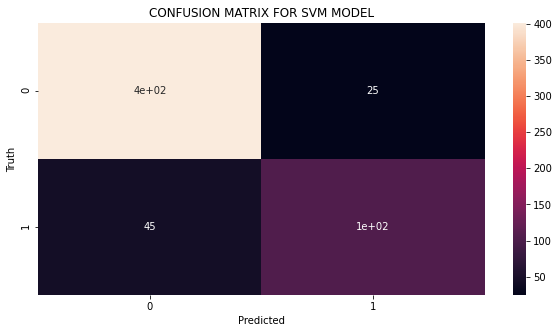

In [44]:
y_predicted = model.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True)
plt.title('CONFUSION MATRIX FOR SVM MODEL')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [45]:
print("Accuracy:{:.6f}".format(metrics.accuracy_score(y_test, y_predicted)))
print("Precision:{:.6f}".format(metrics.precision_score(y_test, y_predicted)))
print("Recall:{:.6f}".format(metrics.recall_score(y_test, y_predicted)))

Accuracy:0.878261
Precision:0.806202
Recall:0.697987


## Random Forest Classifier

In [58]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_jobs=64,criterion='entropy', n_estimators=200)
clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200, n_jobs=64)

In [59]:
clf.score(X_test,y_test)

0.8782608695652174

Text(69.0, 0.5, 'Truth')

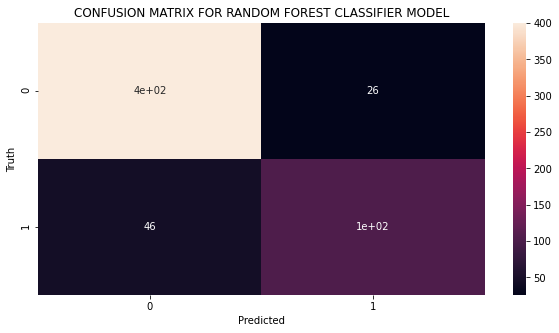

In [48]:
y_predicted = clf.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)

plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True)
plt.title('CONFUSION MATRIX FOR RANDOM FOREST CLASSIFIER MODEL')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print("Accuracy:{:.6f}".format(metrics.accuracy_score(y_test, y_predicted)))
print("Precision:{:.6f}".format(metrics.precision_score(y_test, y_predicted)))
print("Recall:{:.6f}".format(metrics.recall_score(y_test, y_predicted)))

Accuracy:0.874783
Precision:0.798450
Recall:0.691275


## Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',max_iter=10000)

In [51]:
lr.fit(X_train,y_train)

LogisticRegression(max_iter=10000)

In [52]:
lr.score(X_test,y_test)

0.8730434782608696

In [53]:
y_predicted = lr.predict(X_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_predicted)
cm

array([[403,  23],
       [ 50,  99]], dtype=int64)

Text(69.0, 0.5, 'Truth')

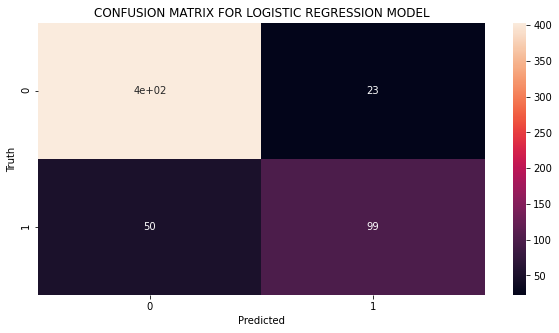

In [54]:
plt.figure(figsize=(10,5))
sb.heatmap(cm,annot=True)
plt.title('CONFUSION MATRIX FOR LOGISTIC REGRESSION MODEL')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [55]:
print("Accuracy:{:.6f}".format(metrics.accuracy_score(y_test, y_predicted)))
print("Precision:{:.6f}".format(metrics.precision_score(y_test, y_predicted)))
print("Recall:{:.6f}".format(metrics.recall_score(y_test, y_predicted)))

Accuracy:0.873043
Precision:0.811475
Recall:0.664430


## Conclusion:
#### For SVM model:
Accuracy:0.893913<br>
Precision:0.813008<br>
Recall:0.724638<br>
<br>
#### For Random forest classifer model:
Accuracy:0.895652<br>
Precision:0.830508<br>
Recall:0.710145<br>
<br>
#### For Logistic Regression model:
Accuracy:0.892174<br>
Precision:0.833333<br>
Recall:0.688406<br>
<br>
So , we see Random forest classifer has highest Accuracy so export this model for our application.


In [56]:
import joblib
joblib.dump(model,'svm_model')
joblib.dump(clf,'random_forest_model')

['random_forest_model']

In [57]:
X.to_csv("Features.csv")
y.to_csv("result.csv")